In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 84s 0us/step


In [10]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [14]:
classes[9]

'truck'

In [13]:
Y_train = Y_train.reshape(-1)
Y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [16]:
def plot_sample(X, Y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[Y[index]])

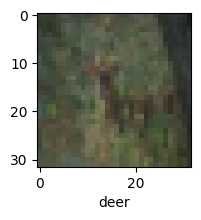

In [21]:
plot_sample(X_train, Y_train, 10)

In [22]:
X_train = X_train / 255
X_test = X_test / 255

In [23]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32, 32, 3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'sigmoid')
])

ann.compile(optimizer = 'SGD', 
            loss = 'sparse_categorical_crossentropy', 
            metrics = ['accuracy'])

ann.fit(X_train, Y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 71s 45ms/step - loss: 1.8162 - accuracy: 0.3510
Epoch 2/5
1563/1563 [==============================] - 68s 44ms/step - loss: 1.6234 - accuracy: 0.4274
Epoch 3/5
1563/1563 [==============================] - 70s 45ms/step - loss: 1.5428 - accuracy: 0.4559
Epoch 4/5
1563/1563 [==============================] - 74s 47ms/step - loss: 1.4830 - accuracy: 0.4789
Epoch 5/5
1563/1563 [==============================] - 70s 45ms/step - loss: 1.4322 - accuracy: 0.4957


In [30]:
cnn = models.Sequential([

    layers.Conv2D(filters = 32, kernel_size =(3,3), activation = 'relu', input_shape = (32, 32, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 64, kernel_size =(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

In [31]:
cnn.compile(optimizer = 'SGD', 
            loss = 'sparse_categorical_crossentropy', 
            metrics = ['accuracy'])

In [35]:
cnn.fit(X_train, Y_train, epochs= 25)

Epoch 1/25
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9284 - accuracy: 0.6806
Epoch 2/25
1563/1563 [==============================] - 21s 14ms/step - loss: 0.8962 - accuracy: 0.6920
Epoch 3/25
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8651 - accuracy: 0.7013
Epoch 4/25
1563/1563 [==============================] - 21s 14ms/step - loss: 0.8368 - accuracy: 0.7127
Epoch 5/25
1563/1563 [==============================] - 21s 14ms/step - loss: 0.8096 - accuracy: 0.7207
Epoch 6/25
1563/1563 [==============================] - 23s 15ms/step - loss: 0.7809 - accuracy: 0.7314
Epoch 7/25
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7559 - accuracy: 0.7388
Epoch 8/25
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7293 - accuracy: 0.7500
Epoch 9/25
1563/1563 [==============================] - 23s 14ms/step - loss: 0.7077 - accuracy: 0.7562
Epoch 10/25
1563/1563 [==============================] - 22s 14m

In [38]:
cnn.evaluate( X_test, Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.2943 - accuracy: 0.6581


[1.2943007946014404, 0.6581000089645386]

In [39]:
Y_test = Y_test.reshape(-1, )
Y_test


array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

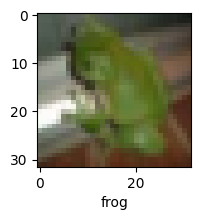

In [42]:
plot_sample(X_test, Y_test, 7)

In [43]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 6ms/step


array([[2.2876153e-03, 1.2955850e-04, 6.2345824e-04, 9.9624169e-01,
        5.2692660e-05, 1.9042937e-04, 3.8795298e-04, 2.3200706e-05,
        6.3451189e-05, 4.1094903e-08],
       [3.2521266e-04, 5.5211651e-01, 3.6090793e-08, 2.7650546e-09,
        2.7780631e-10, 1.1040593e-14, 1.0021346e-11, 2.5365229e-10,
        4.4753137e-01, 2.6757642e-05],
       [4.6642321e-01, 5.6459039e-02, 1.8862558e-05, 8.7719338e-05,
        1.2310801e-04, 9.1017642e-07, 4.7884023e-06, 1.8714860e-03,
        4.7350067e-01, 1.5101249e-03],
       [6.0021931e-01, 3.4571889e-01, 7.6589722e-04, 2.0117783e-03,
        1.1671819e-03, 5.6786245e-08, 2.1243719e-05, 8.7077642e-05,
        4.9754634e-02, 2.5390222e-04],
       [6.3560854e-09, 2.2761997e-06, 1.6001922e-04, 4.4474481e-03,
        9.8478055e-01, 2.0970596e-04, 1.0388790e-02, 5.6804010e-06,
        5.5037858e-06, 1.1955591e-08]], dtype=float32)

In [48]:
Y_classes = [np.argmax(element) for element in y_pred]
Y_classes[:5]

[3, 1, 8, 0, 4]

In [46]:
Y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [51]:
from sklearn.metrics import confusion_matrix, classification_report
print("Classification Report: \n", classification_report(Y_test, Y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.70      0.71      1000
           1       0.60      0.87      0.71      1000
           2       0.63      0.50      0.56      1000
           3       0.56      0.39      0.46      1000
           4       0.60      0.59      0.59      1000
           5       0.60      0.54      0.57      1000
           6       0.68      0.81      0.74      1000
           7       0.75      0.69      0.72      1000
           8       0.71      0.82      0.76      1000
           9       0.71      0.68      0.69      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.65     10000
weighted avg       0.66      0.66      0.65     10000

